In [1]:
import warnings
# 불필요한 경고 출력을 방지합니다.
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
# sklearn 모듈
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
# 시각화 모듈
from IPython.display import Image
import matplotlib.pyplot as plt 
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


### iris 데이터셋 
꽃 종류 분류하기


* DESCR : 데이터셋의 정보를 보여줍니다.
* data : feature data.
* feature_names : feature data의 컬럼 이름
* target : label data (수치형)
* target_names : label의 이름 (문자형)

In [3]:
iris =load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
data = iris['data']
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
target = iris['target']
target[:5]

array([0, 0, 0, 0, 0])

In [7]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 데이터프레임 만들기

In [8]:
df_iris = pd.DataFrame(data, columns=feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df_iris['target'] = target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 시각화

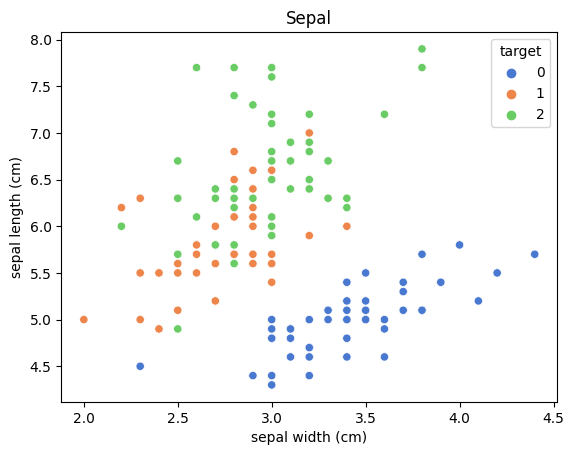

In [10]:
sns.scatterplot(data=df_iris,x='sepal width (cm)', y='sepal length (cm)',
                hue='target', palette='muted')
plt.title('Sepal')
plt.show()

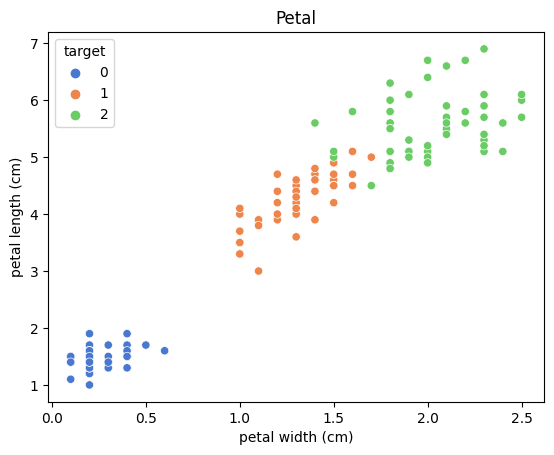

In [11]:
sns.scatterplot(data=df_iris,x='petal width (cm)', y='petal length (cm)',
                hue='target', palette='muted')
plt.title('Petal')
plt.show()

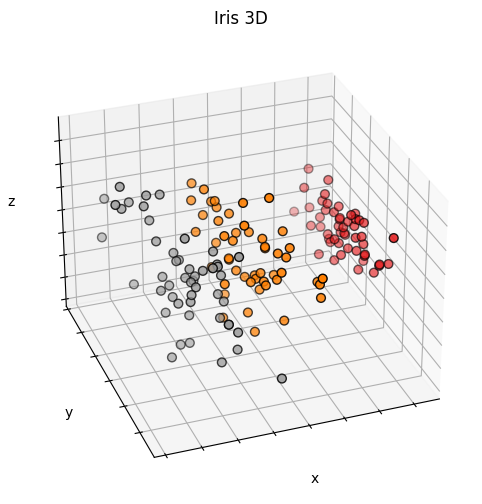

In [12]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d',elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(df_iris.drop('target', 1))
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=df_iris['target'],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Iris 3D")
ax.set_xlabel("x")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("y")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("z")
ax.w_zaxis.set_ticklabels([])
plt.show()

In [67]:
x_train,x_valid,y_train,y_valid=train_test_split(df_iris.drop('target',1),df_iris['target'])
x_train.shape, y_train.shape

((112, 4), (112,))

In [68]:
x_valid.shape, y_valid.shape

((38, 4), (38,))

<Axes: ylabel='count'>

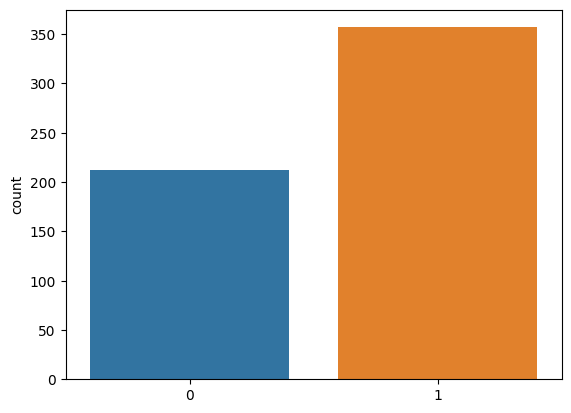

In [69]:
sns.countplot(y_train, x=target)

In [72]:
x_train,x_valid,y_train,y_valid=train_test_split(df_iris.drop('target',1),df_iris['target'],stratify=df_iris['target'])

<Axes: ylabel='count'>

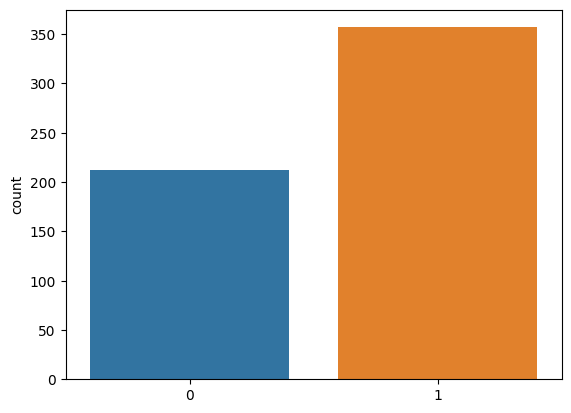

In [73]:
sns.countplot(y_train,x=target)

In [18]:
x_train.shape,y_train.shape

((112, 4), (112,))

In [19]:
x_valid.shape,y_valid.shape

((38, 4), (38,))

### Logistic Regression

* 로지스틱 회귀(영어: logistic regression)는 영국의 통계학자인 D. R. Cox가 1958년에 제안한 확률 모델
* 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법
LogisticRegression, 서포트 벡터 머신 (SVM) 과 같은 알고리즘은 이진 분류만 가능합니다. (2개의 클래스 판별만 가능합니다.)

하지만, 3개 이상의 클래스에 대한 판별을 진행하는 경우, 다음과 같은 전략으로 판별하게 됩니다.

one-vs-rest (OvR): K 개의 클래스가 존재할 때, 1개의 클래스를 제외한 다른 클래스를 K개 만들어, 각각의 이진 분류에 대한 확률을 구하고, 총합을 통해 최종클래스를 판별

one-vs-one (OvO): 4개의 계절을 구분하는 클래스가 존재한다고 가정했을 때, 0vs1, 0vs2, 0vs3, ... , 2vs3 까지 NX(N-1)/2 개의 분류기를 만들어 가장 많이 양성으로 선택된 클래스를 판별

대부분OvsR 전략을 선호합니다.

#### step 1: 모델 선언

In [20]:
model = LogisticRegression()

#### step 2: 모델 학습

In [21]:
model.fit(x_train,y_train)

LogisticRegression()

#### step 3: 예측

In [22]:
prediction = model.predict(x_valid)
prediction[:5]

array([1, 0, 2, 0, 2])

#### step 4: 평가

In [23]:
(prediction==y_valid).mean()

0.9736842105263158

### SGDClassifier
stochastic gradient descent (SGD) : 확률적 경사 하강법

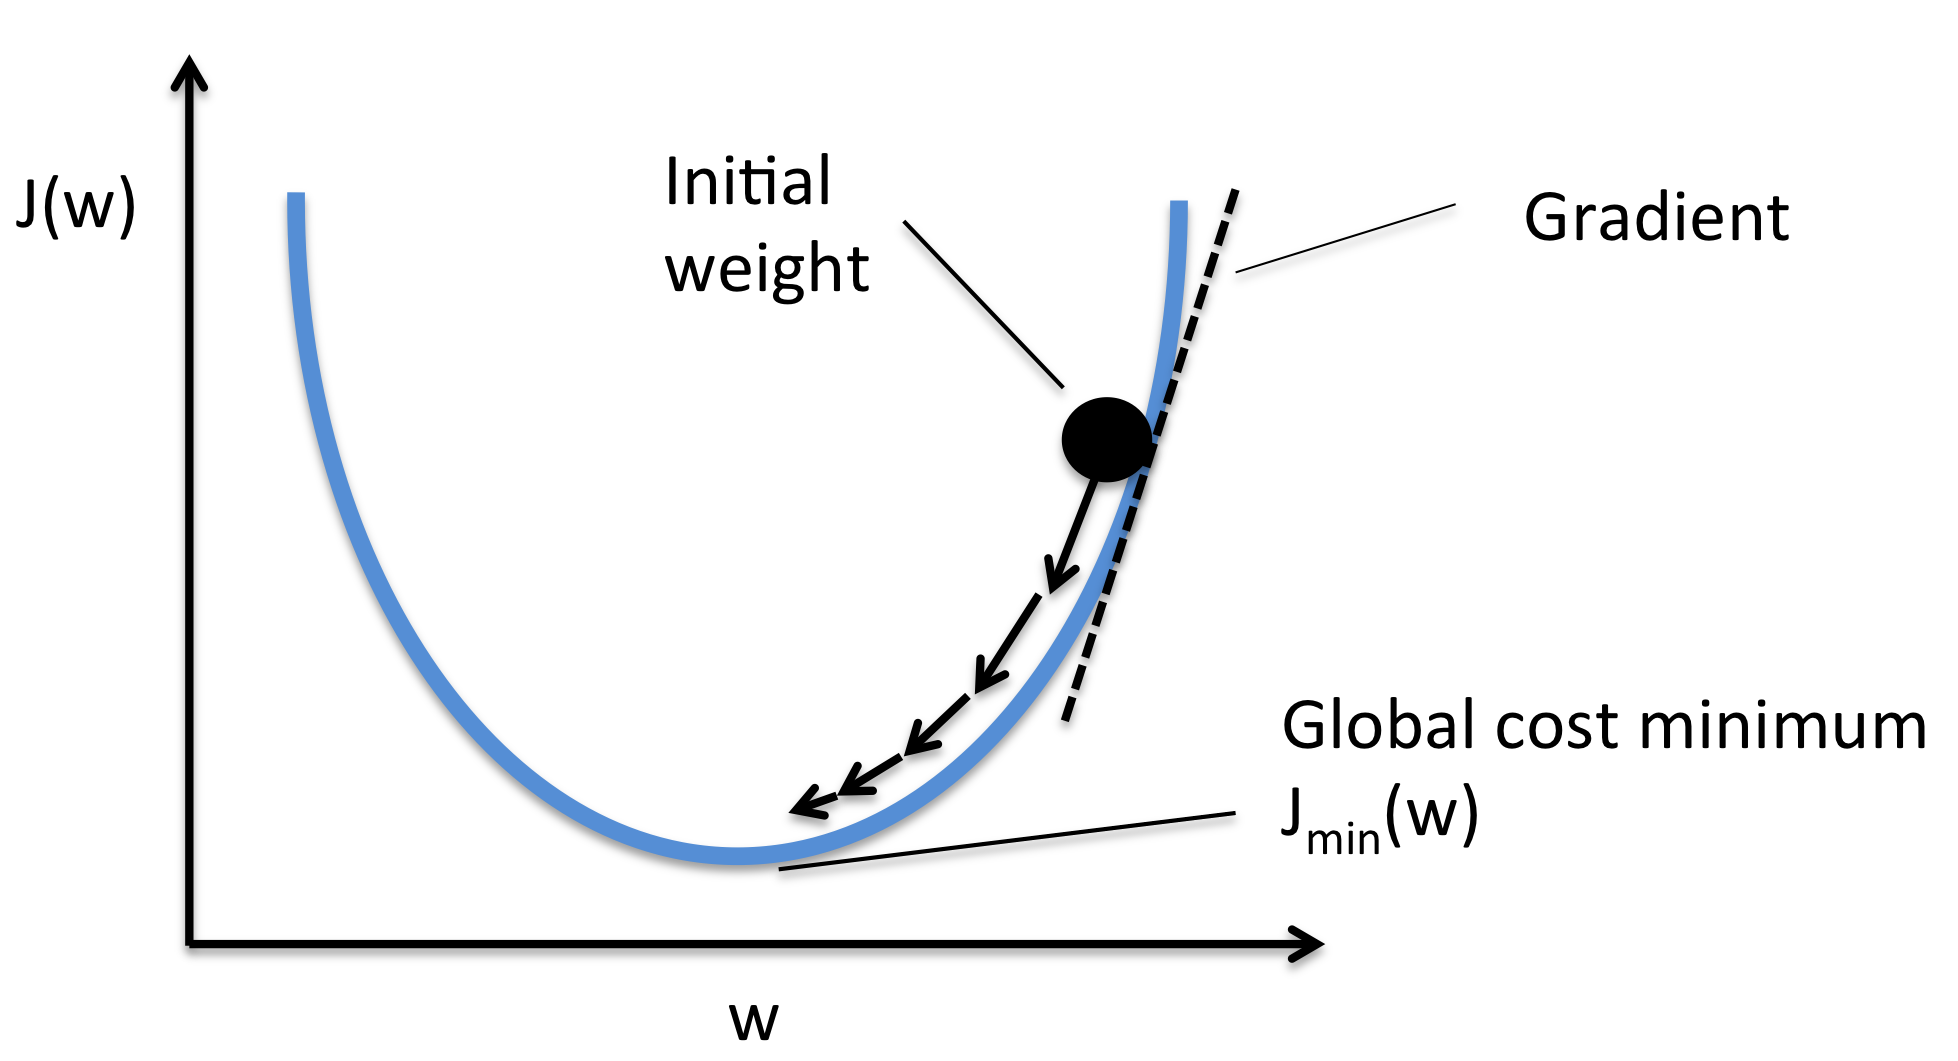

In [24]:
Image('https://machinelearningnotepad.files.wordpress.com/2018/04/yk1mk.png',width=500)

#### 모델 선언 -> 학습 -> 예측 

In [25]:
sgd=SGDClassifier(random_state=0)
sgd.fit(x_train,y_train)
prediction=sgd.predict(x_valid)
(prediction==y_valid).mean()

0.8157894736842105

### 하이퍼 파라미터 (hyper-parameter) 튜닝

각 알고리즘 별, hyper-parameter의 종류가 다양합니다.

모두 다 외워서 할 수는 없습니다! 문서를 보고 적절한 가설을 세운 다음 적용하면서 검증해야합니다.

(나중에는 이 또한 자동으로 할 수 있습니다)

* random_state: 하이퍼 파라미터 튜닝시, 고정할 것
* n_jobs=-1: CPU를 모두 사용 (학습속도가 빠름)

In [26]:
sgd=SGDClassifier(penalty='l1',random_state=0,n_jobs=-1)
sgd.fit(x_train,y_train)
prediction=sgd.predict(x_valid)
(prediction==y_valid).mean()

1.0

### KNeighborsClassifier

최근접 이웃 알고리즘

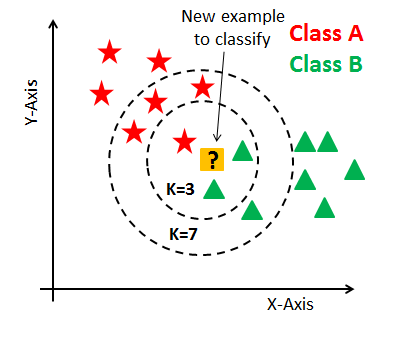

In [27]:
# 출처: 데이터 캠프
Image('https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png')

In [28]:
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
knc_pred=knc.predict(x_valid)
(knc_pred==y_valid).mean()

1.0

In [29]:
knc=KNeighborsClassifier(n_neighbors=9)
knc.fit(x_train,y_train)
knc_pred=knc.predict(x_valid)

In [30]:
(knc_pred==y_valid).mean()

0.9736842105263158

### 서포트 벡터 머신 (SVC)

* 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만듦.
* 경계로 표현되는 데이터들 중 가장 큰 폭을 가진 경계를 찾는 알고리즘.

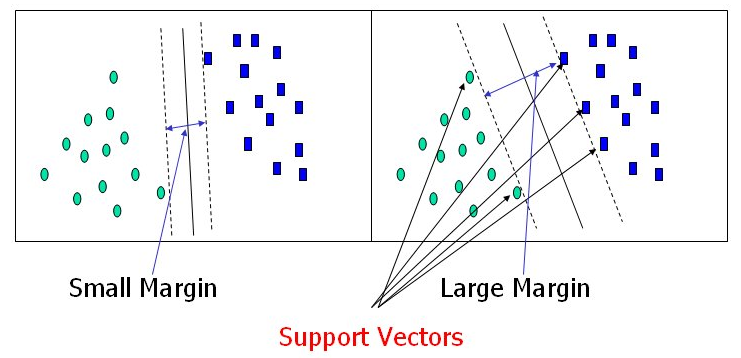

In [31]:
Image('https://csstudy.files.wordpress.com/2011/03/screen-shot-2011-02-28-at-5-53-26-pm.png')

LogisticRegression과 같이 이진 분류만 가능합니다. (2개의 클래스 판별만 가능합니다.)

* OvsR 전략 사용

In [32]:
svc=SVC(random_state=0,)
svc.fit(x_train,y_train)
svc_pred=svc.predict(x_valid)

In [33]:
svc

SVC(random_state=0)

In [34]:
(svc_pred==y_valid).mean()

0.9736842105263158

In [35]:
svc_pred[:5]

array([1, 0, 2, 0, 2])

각 클래스 별 확률값을 return 해주는 decision_function()

In [36]:
svc.decision_function(x_valid)[:5]

array([[-0.22907146,  2.2277834 ,  1.0125167 ],
       [ 2.24324366,  1.02427778, -0.24511658],
       [-0.23710345,  1.160533  ,  2.20183668],
       [ 2.22460845,  1.16840594, -0.25177259],
       [-0.24247013,  1.16543643,  2.20910231]])

### 의사 결정 나무 (Decision Tree)

스무고개처럼, 나무 가지치기를 통해 소그룹으로 나누어 판별하는 것

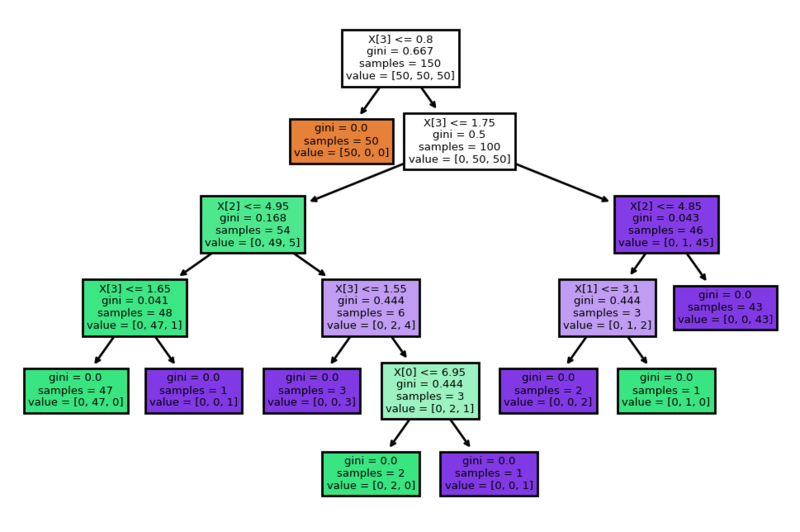

In [37]:
dtc=DecisionTreeClassifier(random_state=0)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [38]:
dtc_pred=dtc.predict(x_valid)

In [39]:
(dtc_pred==y_valid).mean()

0.9736842105263158

### 오차 (Error)

#### 정확도의 함정

유방암 환자 데이터셋을 로드합니다.

target: 0: 악성종양, 1:양성종양

In [40]:
cancer=load_breast_cancer()
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [41]:
data=cancer['data']
target=cancer['target']
feature_names=cancer['feature_names']

In [42]:
df=pd.DataFrame(data=data,columns=feature_names)
df['target']=cancer['target']

In [43]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [44]:
pos=df.loc[df['target']==1]
neg=df.loc[df['target']==0]

In [45]:
pos

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,1
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,1
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,1
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,1


In [46]:
sample=pd.concat([pos,neg[:5]],sort=True)

In [47]:
x_train,x_test,y_train,y_test=train_test_split(sample.drop('target',1),sample['target'],random_state=42)

In [48]:
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)

In [49]:
(pred==y_test).mean()

0.978021978021978

In [50]:
my_prediction=np.ones(shape=y_test.shape)

In [51]:
(my_prediction==y_test).mean()

0.989010989010989

정확도만 놓고 본다면, 음성 환자로 예측하는 분류기가 성능이 좋다

정확도(accuracy)만 보고 분류기의 성능을 판별하는 것은 오류에 빠질 수 있다

이를 보완하고 생겨난 지표들이 있다

### 오차 행렬 (confusion maxtix)

In [52]:
confusion_matrix(y_test,pred)

array([[ 1,  0],
       [ 2, 88]])

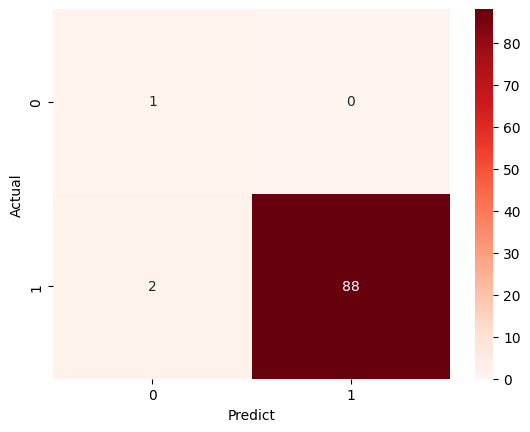

In [53]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap='Reds', )
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

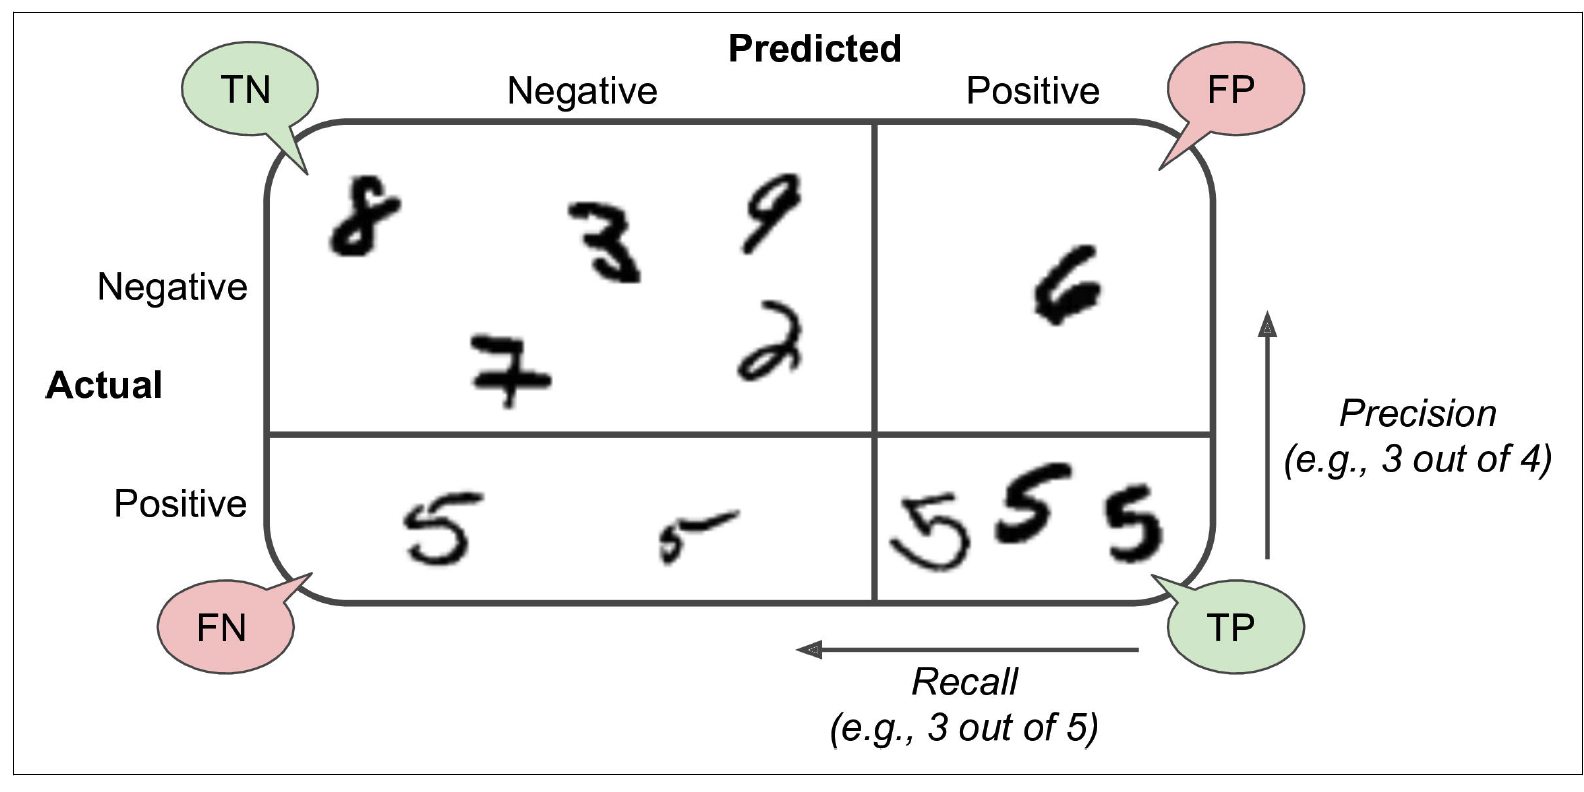

In [54]:
# 출처: https://dojinkimm.github.io
Image('https://dojinkimm.github.io/assets/imgs/ml/handson_3_1.png',width=500)

### 정밀도 (precision)

양성 예측 정확도

TP / (TP + FP)

In [55]:
precision_score(y_test,pred)

1.0

### 재현율 (recall)

TP / (TP + FN)

정확하게 감지한 양성 샘플의 비율이다.

민감도 (sensitivity) 혹은 True Positive Rate (TPR)이라고도 불린다

In [56]:
recall_score(y_test,pred)

0.9777777777777777

In [57]:
88/90

0.9777777777777777

### f1 score
정밀도와 재현율의 조화 평균을 나타내는 지표다.

2∗(정밀도 ∗ 재현율)/(정밀도 + 재현율)=𝑇𝑃/[𝑇𝑃 +{(𝐹𝑁+𝐹𝑃)/2}]

In [58]:
f1_score(y_test,pred)

0.9887640449438202